In [148]:
import pandas as pd
import numpy as np
import sklearn.preprocessing

In [3]:
raw_houses_df = pd.read_csv('../data/01_houses/train.csv')
raw_houses_df.dropna(axis=1)
houses_df = raw_houses_df.filter(c for c in raw_houses_df.columns if raw_houses_df.dtypes[c] in [np.int64, np.float64])
houses_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [4]:
from sklearn.model_selection import train_test_split

y_cols = ['SalePrice']
X_cols = [c for c in houses_df.columns if c not in y_cols]

raw_X, raw_y = houses_df.filter(X_cols).to_numpy(), houses_df.filter(y_cols).to_numpy()

In [5]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_scaler.fit(raw_X)
# y_scaler = StandardScaler()
# y_scaler.fit(raw_y)
X = np.nan_to_num( X_scaler.transform(raw_X).astype(np.float32), True, 0)
y = np.nan_to_num( raw_y/1000, True, 0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [6]:
pd.DataFrame(X_train, columns=X_cols)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.256330,-0.872563,0.409895,-0.197520,-1.518467,-0.517200,1.050994,0.927122,-0.572835,-0.973018,...,-0.154306,0.301331,0.261798,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.229111,1.645210
1,-0.390305,0.309859,-0.166839,-0.366695,-0.071836,-1.416142,-1.863632,-1.689368,-0.572835,-0.973018,...,-1.202350,-0.752176,0.291994,1.866599,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,1.645210
2,-1.251585,-0.163109,-0.825963,-0.352464,-0.071836,0.381743,-1.565545,-1.689368,-0.572835,0.380225,...,-0.350814,-0.752176,-0.704483,1.702929,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-1.367655
3,-1.284802,0.782828,-0.249230,-0.350660,-0.795151,-0.517200,0.256096,-0.284216,0.946470,1.408864,...,0.257425,0.205557,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,0.891994
4,-1.448517,0.073375,-0.208034,-0.206039,-0.071836,-0.517200,1.117235,1.024029,-0.572835,-0.973018,...,-0.388245,-0.752176,-0.342128,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.250891,-1.367655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1.118715,0.073375,0.409895,-0.011709,0.651479,-0.517200,0.885390,0.636400,-0.572835,-0.973018,...,0.341643,0.828084,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.229111,0.891994
1164,-1.211249,1.492282,-1.114330,-0.752350,0.651479,-0.517200,1.117235,1.024029,-0.484439,-0.937926,...,-0.163664,0.109784,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.229111,-1.367655
1165,-1.505461,0.073375,0.000000,-0.075350,-0.071836,2.179628,0.719786,0.394133,-0.197152,-0.293107,...,-0.247882,1.099442,0.246699,-0.359325,-0.116339,-0.270208,-0.068692,0.880146,-0.859110,0.891994
1166,-0.074739,-0.872563,-0.208034,-0.207142,-0.795151,2.179628,-0.207594,1.169389,-0.572835,0.239856,...,-0.640898,2.567966,1.469649,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import r_regression
clf = DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [123]:
import shap

explainer = shap.explainers.Tree(clf, X_train)
svt = explainer(X_train)
explainer = shap.explainers.Permutation(clf.predict, X_train)
svp = explainer(X_train)
explainer = shap.explainers.Sampling(clf.predict, X_train)
svs = explainer(X_train)


Permutation explainer: 1169it [00:15, 28.87it/s]                          
100%|██████████| 1168/1168 [26:34<00:00,  1.37s/it]


In [126]:
exp_t= shap.Explanation( svt.values, svt.base_values[0], X_scaler.inverse_transform(svt.data), feature_names=X_cols)
exp_p = shap.Explanation( svp.values, svp.base_values[0], X_scaler.inverse_transform(svp.data), feature_names=X_cols)
exp_s = shap.Explanation( svs.values, svs.base_values, X_scaler.inverse_transform(svs.data), feature_names=X_cols)

In [116]:
# shap.plots.waterfall(exp[1])

In [117]:
# shap.plots.beeswarm(exp)

In [127]:
corr = r_regression(X_train, y_train[:,0])
shap_tree = np.mean(svt.values, 0)
shap_permutation = np.mean(svp.values, 0)
shap_sampling = np.mean(svs.values, 0)

In [149]:
df_pearson = pd.DataFrame([X_cols, ['Pearson']*len(X_cols), np.abs(corr).tolist(),  ], index=['feature', 'estimator', 'value'])[:8].T
df_shapt = pd.DataFrame([X_cols, ['SHAP - tree']*len(X_cols), np.abs(shap_tree).tolist(),  ], index=['feature', 'estimator', 'value'])[:8].T
df_shapp = pd.DataFrame([X_cols, ['SHAP - permute']*len(X_cols), np.abs(shap_permutation).tolist(),  ], index=['feature', 'estimator', 'value'])[:8].T
df_shaps = pd.DataFrame([X_cols, ['SHAP - sample']*len(X_cols), np.abs(shap_sampling).tolist(),  ], index=['feature', 'estimator', 'value'][:100]).T

df_shapt = sklearn.preprocessing.scale(df_shapt)
df_shapp = sklearn.preprocessing.scale(df_shapp)
df_shaps = sklearn.preprocessing.scale(df_shaps)

df = pd.concat((df_pearson, df_shapt, df_shapp, df_shaps))
df

ValueError: could not convert string to float: 'Id'

<Figure size 2000x2000 with 0 Axes>

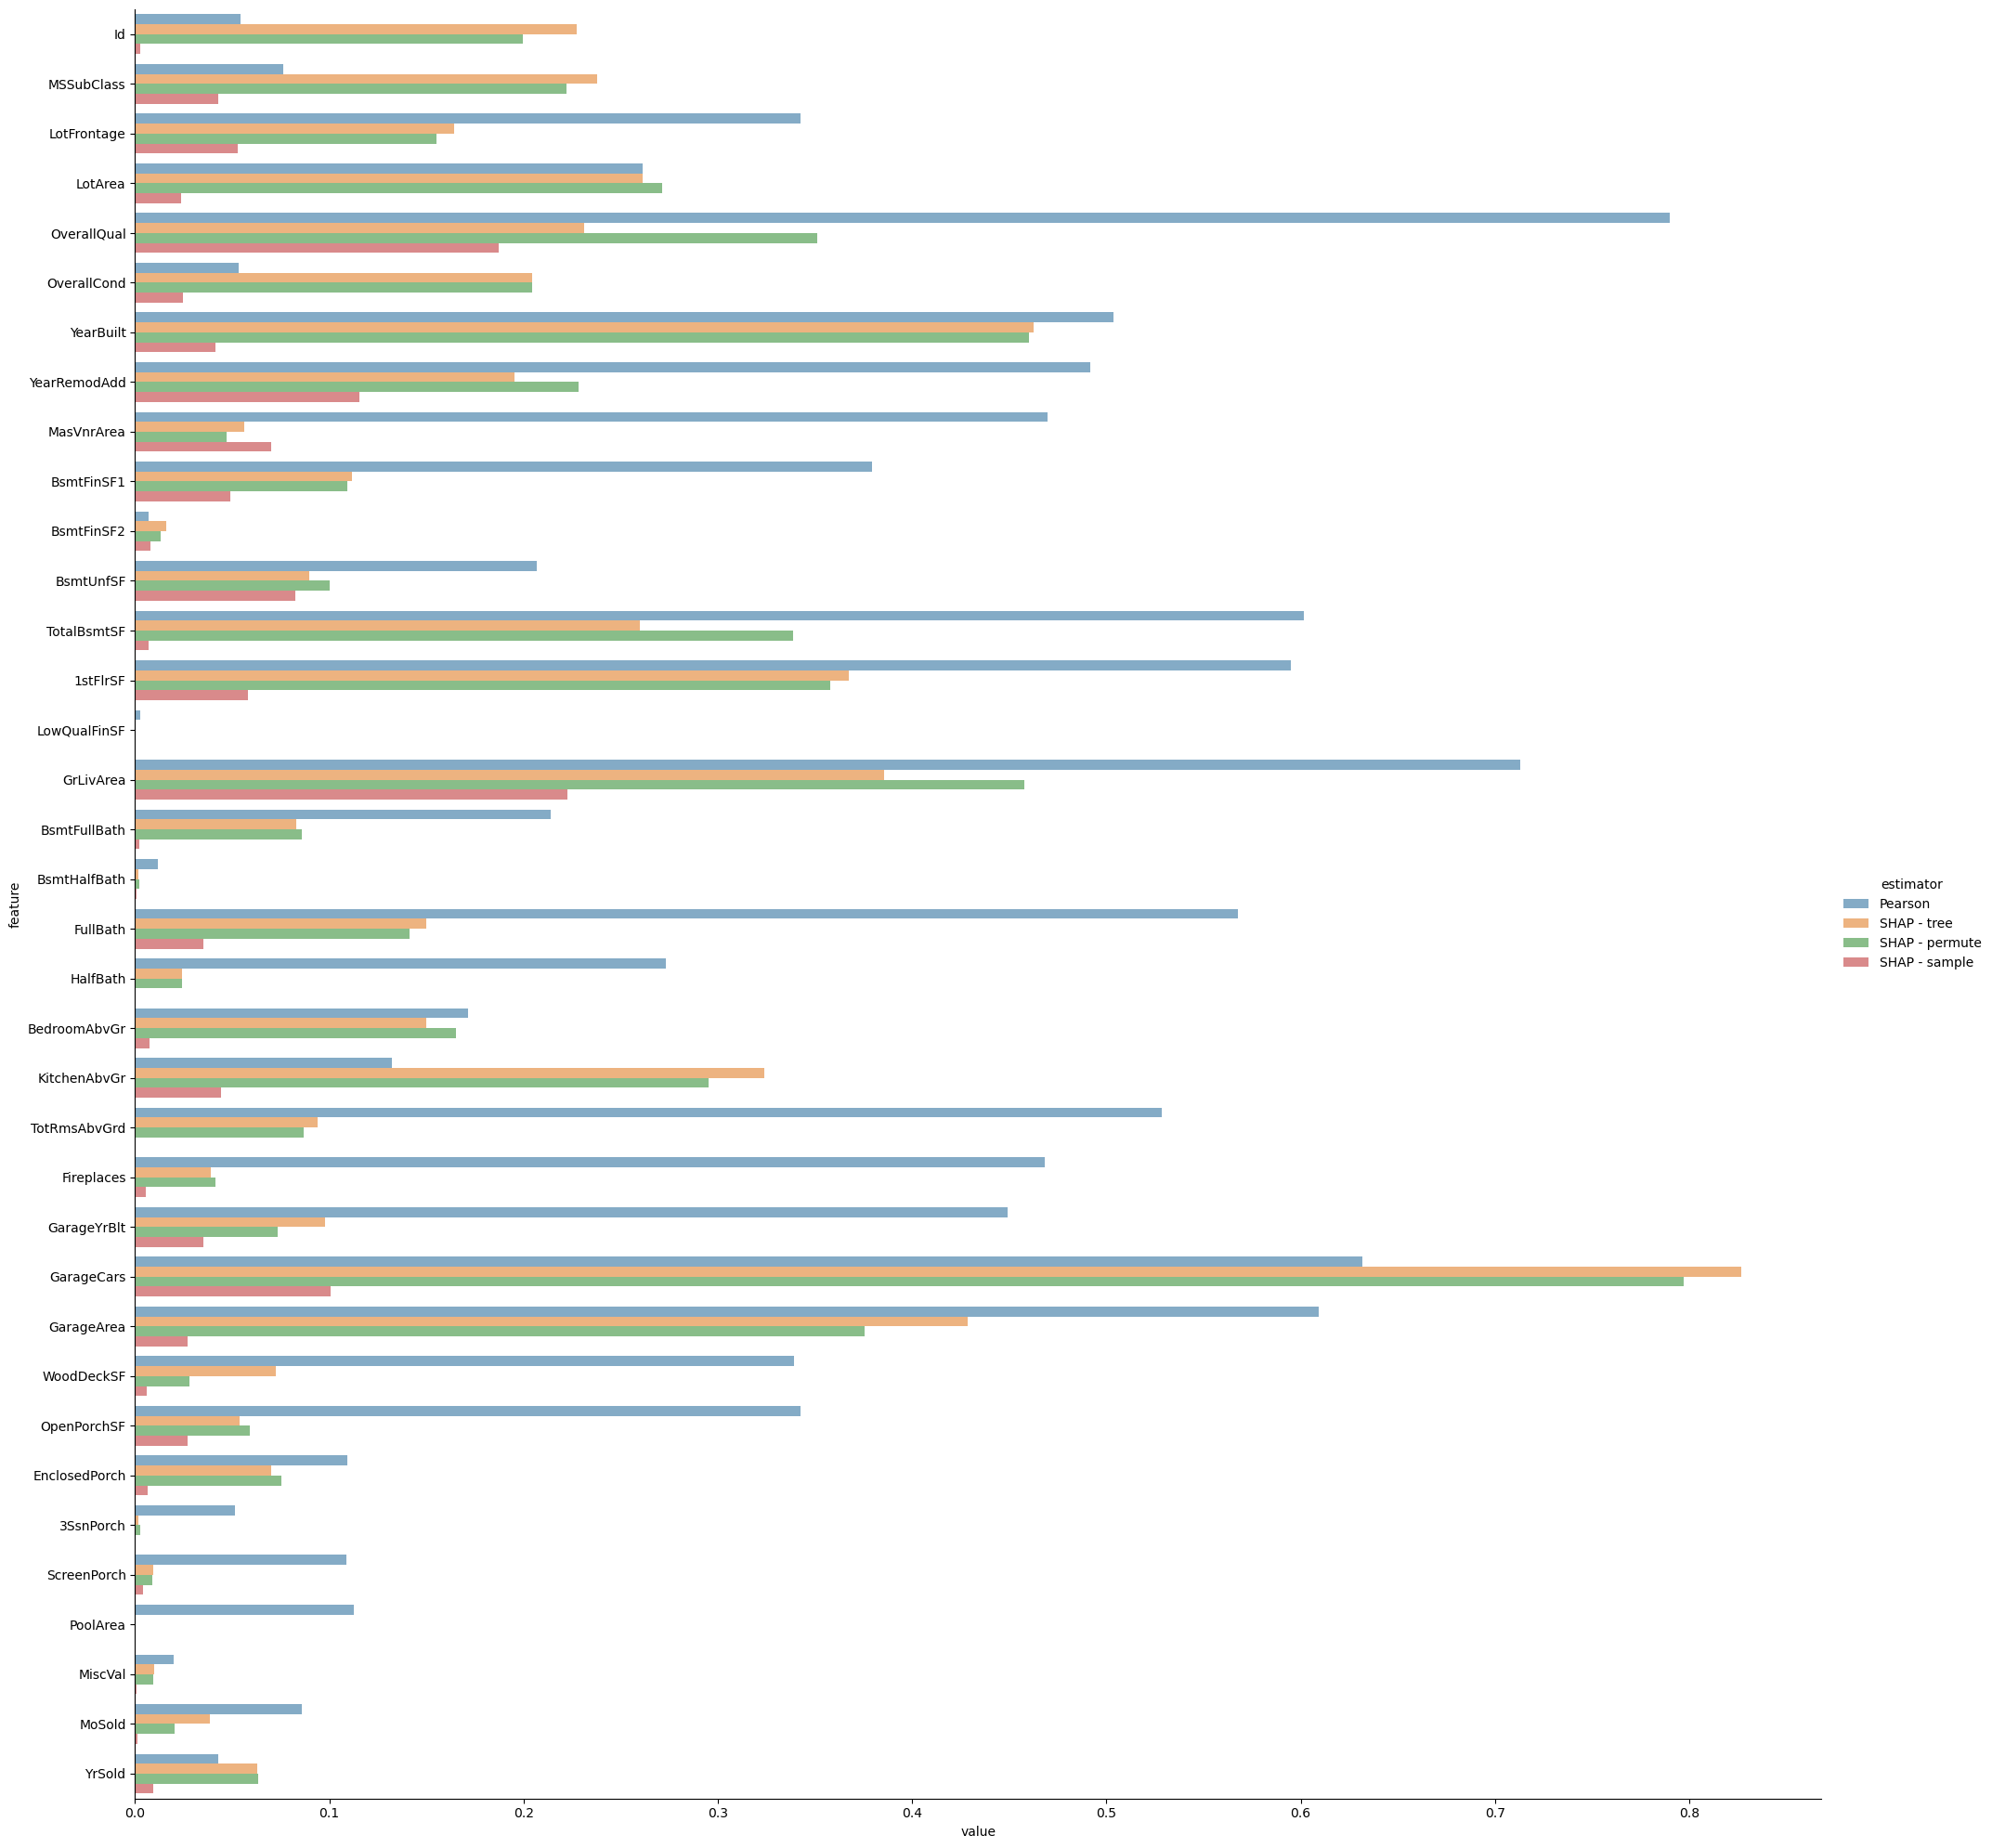

In [147]:

plt.figure(figsize=(20,20))
sns.catplot(
    data=df[df["feature"] != '2ndFlrSF'], kind="bar",
    y="feature", x="value", hue="estimator",
     alpha=.6, height=20
)